In [1]:
# Import all necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data
df = pd.read_csv("extracted_data.csv")
df.head()

,label,url_len,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,sus_url,short_url,...,hostname_len,fd_length,tld,digit_count,letter_count,count%,count-,count=,count_embed_domian,count?
0,3,16,0,0,2,0,0,0,0,0,...,0,0,-1,0,13,0,1,0,0,0
1,0,35,0,0,2,0,0,2,0,0,...,0,5,-1,1,29,0,0,0,0,0
2,0,31,0,0,2,0,0,3,0,0,...,0,7,-1,1,25,0,0,0,0,0
3,1,88,0,1,3,1,0,1,0,0,...,21,9,2,7,63,0,1,4,0,0
4,1,235,0,1,2,0,0,1,0,0,...,23,9,3,22,199,0,1,3,0,0


In [3]:
# Separate dependent and independent variables
features = [
    'url_len', 'use_of_ip', 'abnormal_url', 'count.', 'count-www',
    'count@', 'count_dir', 'sus_url', 'short_url', 'count_https',
    'count_http', 'hostname_len', 'fd_length', 'tld', 'digit_count',
    'letter_count', 'count%', 'count-', 'count=', 'count_embed_domian',
    'count?'
]
target = 'label'

X = df[features]
y = df[target]

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [5]:
# Perform standardization of features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Initialize all models
models = [
    ('decision_tree', DecisionTreeClassifier()),
    ('logistic_regression', LogisticRegression(max_iter=200, multi_class='auto')),
    ('mlp', MLPClassifier(hidden_layer_sizes=(64, 32),max_iter=300, random_state=42)),
    ('knn', KNeighborsClassifier())
]

In [ ]:
# Train each model and make predictions
predictions = []
for name, model in models:  
    model.fit(X_train, y_train)
    preds = model.predict_proba(X_test)
    predictions.append(preds)

In [8]:
# Average the predictions
avg_preds = np.mean(predictions, axis=0)

In [9]:
# Get the final predictions by taking the argmax
final_preds = np.argmax(avg_preds, axis=1)

In [10]:
# Results
accuracy = accuracy_score(y_test, final_preds)
report = classification_report(y_test, final_preds)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9631276028262599
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     42763
           1       0.97      0.99      0.98      9508
           2       0.98      0.89      0.94      2341
           3       0.92      0.84      0.88      9501

    accuracy                           0.96     64113
   macro avg       0.96      0.93      0.94     64113
weighted avg       0.96      0.96      0.96     64113



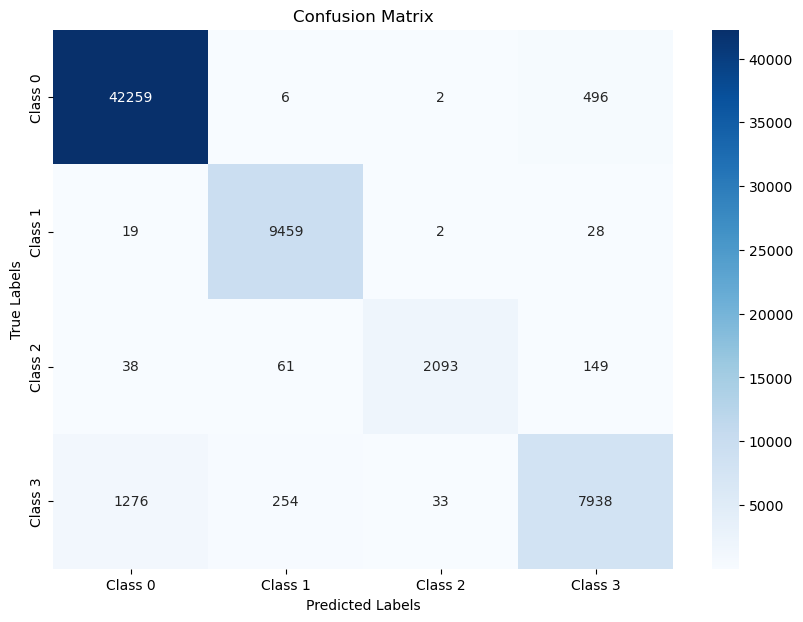

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, final_preds)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Class {i}' for i in range(cm.shape[1])],  
            yticklabels=[f'Class {i}' for i in range(cm.shape[0])])  
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()